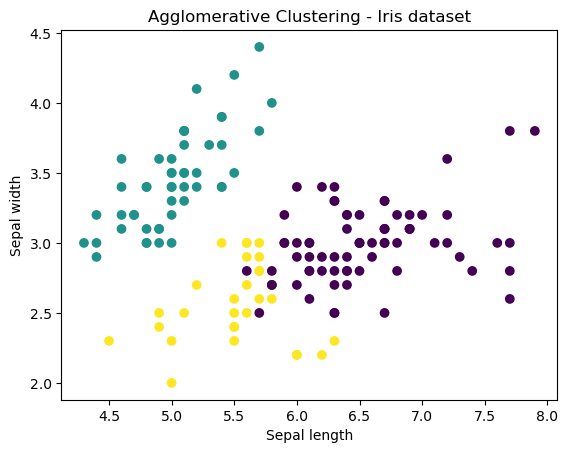

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=y_agg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agglomerative Clustering - Iris dataset')
plt.show()

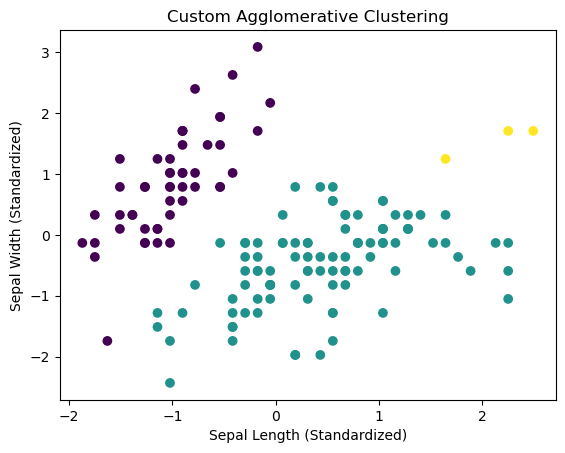

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Function to compute Euclidean Distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Hierarchical Clustering (Agglomerative) function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist, idx1, idx2 = dist_matrix[i, j], i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg = agglomerative_clustering(X_std, n_clusters=3)

# Visualize the clustering result of custom function
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg, cmap='viridis')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()

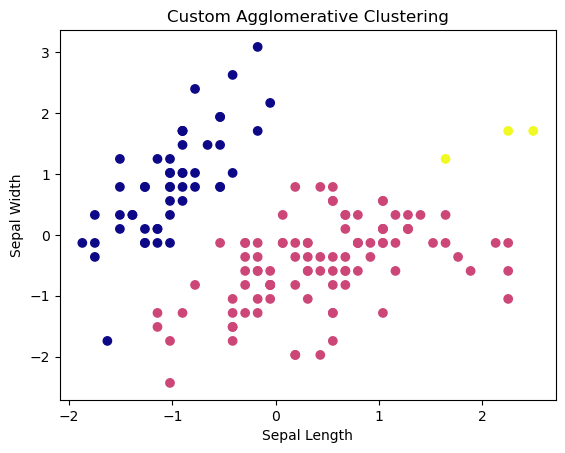

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

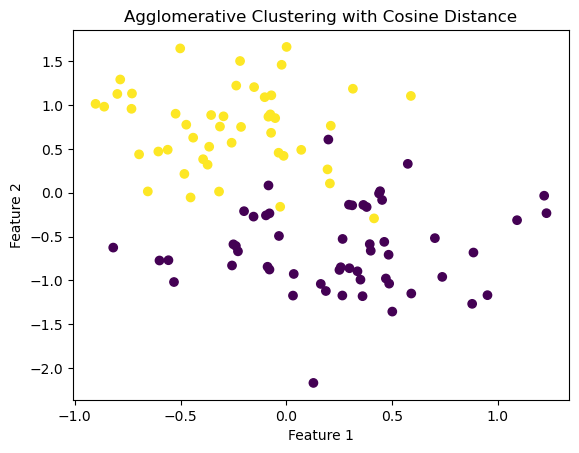

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset
sample_data = make_blobs(n_samples=100, centers=2, n_features=3, cluster_std=0.5, center_box=(-0.8, 0.8), random_state=42)[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Agglomerative Clustering with Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

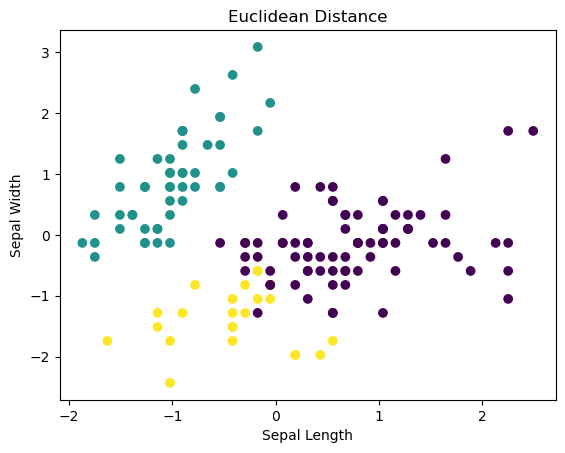

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load and scale the Iris dataset
dataset = load_iris().data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Define the number of clusters
n_clusters = 3

# Initialize one AgglomerativeClustering model with 'euclidean' distance metric
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')

# Fit the model and get the labels
labels = model.fit_predict(dataset)

# Plot the results using the first and second features of the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

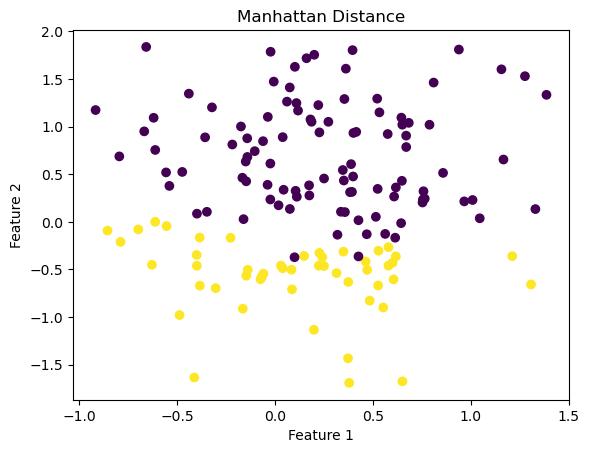

In [6]:
# Exercise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    return sum(abs(point1 - point2))

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset with 3 close clusters and center_box parameter
sample_data = make_blobs(n_samples=150, centers=2, n_features=3, cluster_std=0.5, random_state=0, center_box=(-2, 2))[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

# Plot the results
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Manhattan Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



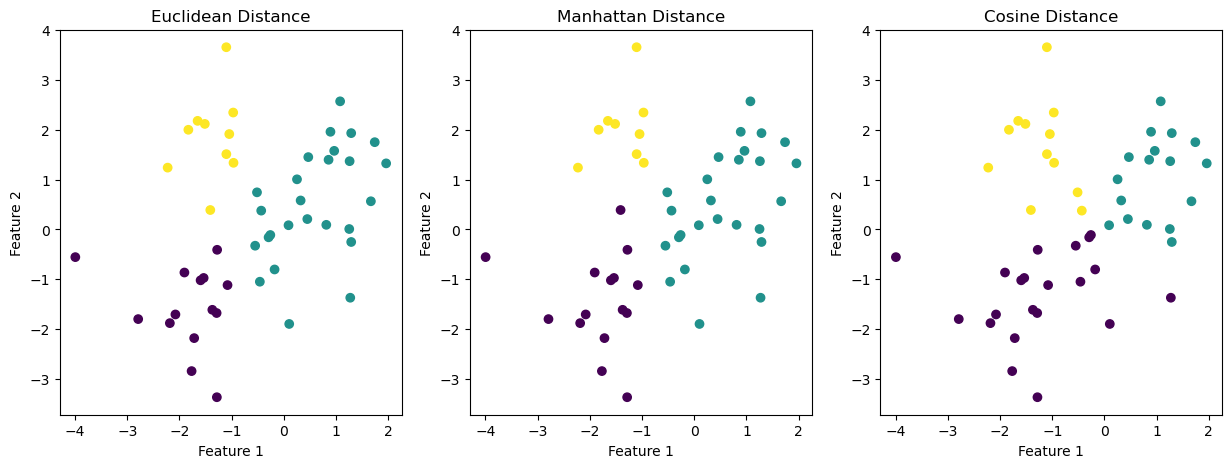

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate the sample data
X, _ = make_blobs(n_samples=50, centers=3, n_features=2, center_box=(-2, 2), random_state=42)

# Perform Agglomerative Clustering with Sklearn
n_clusters = 3
# TODO: Create an instance of AgglomerativeClustering with the 'euclidean' metric and set linkage to 'average'
cluster_euc = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean',linkage='average')
# TODO: Create an instance of AgglomerativeClustering with the 'manhattan' metric and set linkage to 'average'
cluster_man = AgglomerativeClustering(n_clusters=n_clusters,metric='manhattan',linkage='average')
# TODO: Create an instance of AgglomerativeClustering with the 'cosine' metric and set linkage to 'average'
cluster_cos = AgglomerativeClustering(n_clusters=n_clusters,metric='cosine',linkage='average')
# TODO: Calculate the cluster labels for each distance metric
labels_euc = cluster_euc.fit_predict(X)
labels_man = cluster_man.fit_predict(X)
labels_cos = cluster_cos.fit_predict(X)
# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_euc, cmap='viridis')
axs[0].set_title('Euclidean Distance')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=labels_man, cmap='viridis')
axs[1].set_title('Manhattan Distance')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

axs[2].scatter(X[:, 0], X[:, 1], c=labels_cos, cmap='viridis')
axs[2].set_title('Cosine Distance')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.show()

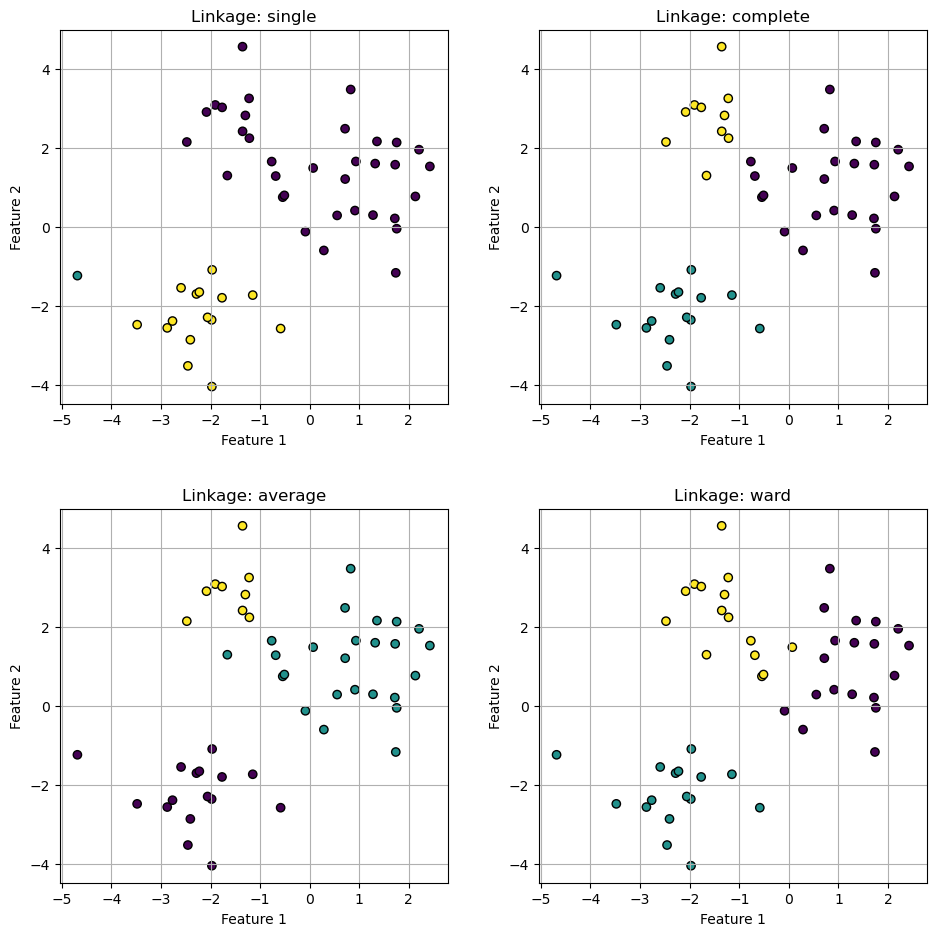

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data with a set seed for reproducibility
X, _ = make_blobs(n_samples=50, centers=3, center_box=(-3, 3), random_state=42)

# Define the different linkage methods to be compared
linkage_methods = ['single', 'complete', 'average', 'ward']

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through each linkage method and apply Agglomerative Clustering
for i, linkage in enumerate(linkage_methods):
    # Initialize AgglomerativeClustering with 3 clusters using one of the provided linkage methods
    clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    # Fit and predict labels
    labels = clustering.fit_predict(X)
    
    # Plot the clusters (complete the plotting code using the correct variables)
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    axs[i].set_title(f'Linkage: {linkage}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
    axs[i].grid(True)

# Show the plot
plt.tight_layout(pad=3)
plt.show()

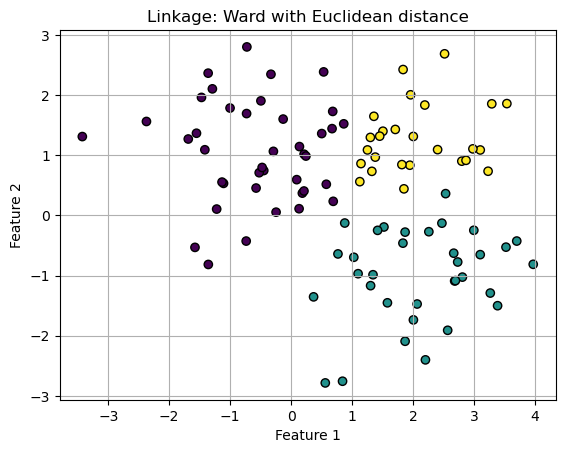

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data with a different random state
X, _ = make_blobs(n_samples=100, centers=3, center_box=(-2, 2), random_state=24)

# TODO: # Modify linkage and distance metric here to use Ward's method with Euclidean distance
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

# Fit and predict labels
labels = clustering.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
# TODO: Don't forget to update the title as well
plt.title('Linkage: Ward with Euclidean distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

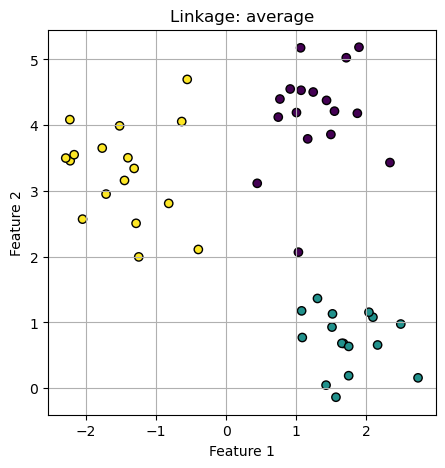

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Create a dataset with make_blobs
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=0.60, random_state=0)

# Setup plot
fig, ax = plt.subplots(figsize=(5, 5))

# TODO: Add code to initialize AgglomerativeClustering with the 'average' linkage method
clustering = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')

labels = clustering.fit_predict(X)

# TODO: Add code to scatter plot the results, with colors for different clusters and set the title to 'Linkage: average'
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('Linkage: average')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Show the plot
plt.tight_layout()
plt.show()

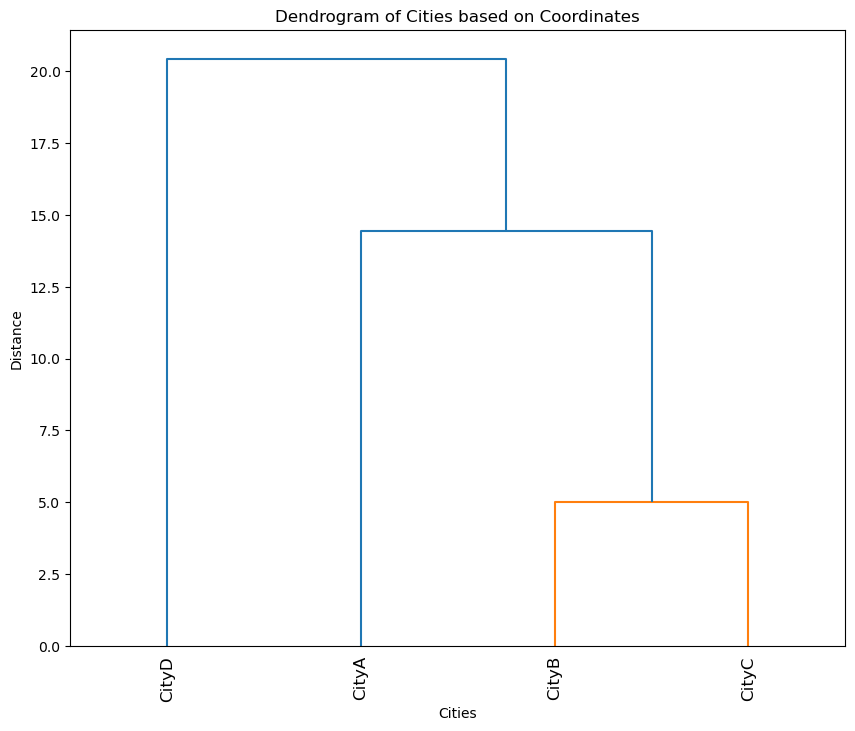

In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample dataset with simplified data
data = {
    'city': ['CityA', 'CityB', 'CityC', 'CityD'],
    'x_coordinate': [10, 20, 15, 25],
    'y_coordinate': [10, 20, 20, 30]
}

# Convert data to an array of coordinates
coordinates = np.column_stack((data['x_coordinate'], data['y_coordinate']))

# Perform hierarchical clustering
Z = linkage(coordinates, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=data['city'], leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram of Cities based on Coordinates')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

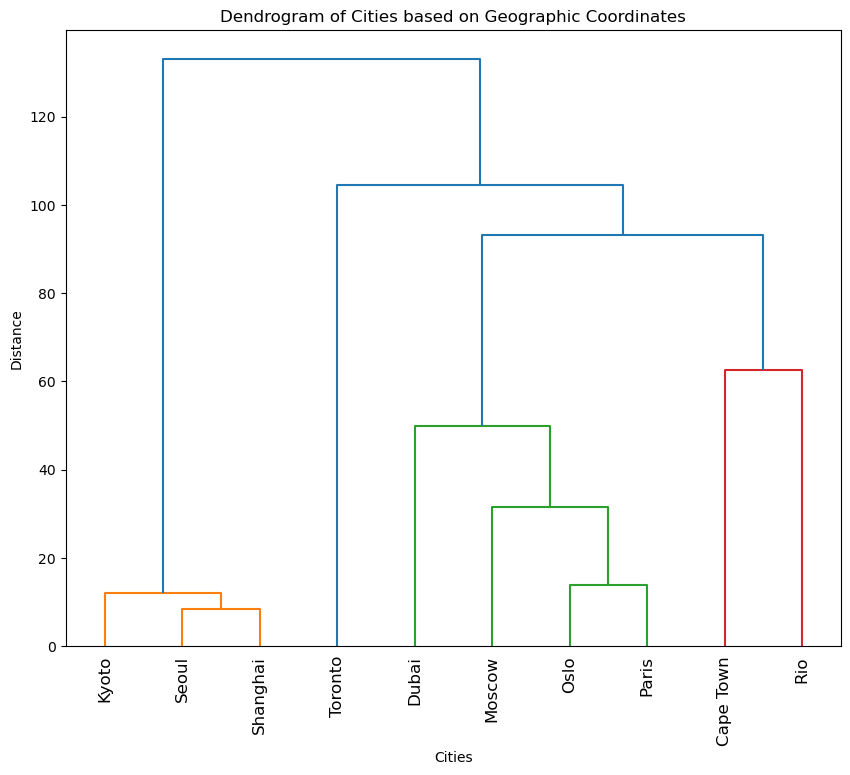

In [2]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'city': ['Kyoto', 'Oslo', 'Cape Town', 'Rio', 'Moscow', 'Paris', 'Dubai', 'Toronto', 'Seoul', 'Shanghai'],
    'long': [135.7681, 10.7522, 18.4241, -43.1729, 37.6173, 2.3522, 55.2708, -79.3832, 126.9780, 121.4737],
    'lat': [35.0116, 59.9139, -33.9249, -22.9068, 55.7558, 48.8566, 25.2048, 43.6532, 37.5665, 31.2304]
}

# Convert data to an array of coordinates
coordinates = np.column_stack((data['long'], data['lat']))

# Perform hierarchical clustering
Z = linkage(coordinates, method='average')

# Plotting the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=data['city'], leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram of Cities based on Geographic Coordinates')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.show()

Silhouette Score is: 0.7349570756575778
Davies-Bouldin index is: 0.30277322334473844
Cross-tabulation counts are: 
col_0  count
row_0       
0          3
1          3
2          3


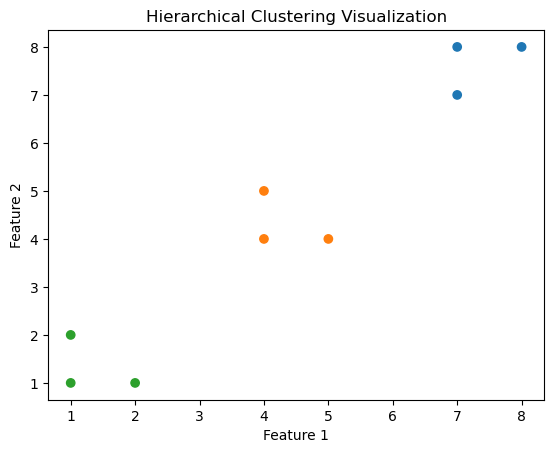

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Sample data for clustering
data = [(1, 2), (2, 1), (1, 1), (4, 4), (5, 4), (4, 5), (7, 7), (8, 8), (7, 8)]

# Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=3).fit(data)

# Calculate the Silhouette Score
s_score = silhouette_score(data, clustering.labels_)
print(f"Silhouette Score is: {s_score}")  # higher the better

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(data, clustering.labels_)
print(f"Davies-Bouldin index is: {db_index}")

# Cross-Tabulation Analysis
cross_tabulation_counts = pd.crosstab(index=clustering.labels_, columns="count")
print(f"Cross-tabulation counts are: \n{cross_tabulation_counts}")

# Visualizing the clustered data with matplotlib
plt.scatter(*zip(*data), c=[f'C{i}' for i in clustering.labels_])
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Silhouette Score is: 0.7349570756575778
Davies-Bouldin index is: 0.30277322334473844
Cross-tabulation counts are: 
col_0  count
row_0       
0          3
1          3
2          3


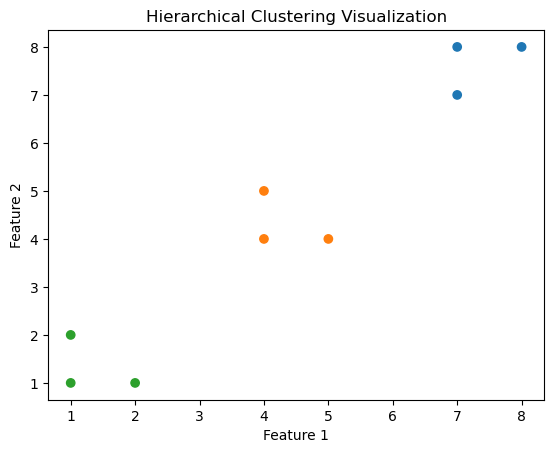

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Define the data points
data = [(1, 2), (2, 1), (1, 1), (4, 4), (5, 4), (4, 5), (7, 7), (8, 8), (7, 8)]

# TODO: Perform hierarchical clustering on the defined data
clustering = AgglomerativeClustering(n_clusters=3).fit(data)

# TODO: Calculate and print the silhouette score
s_score = silhouette_score(data, clustering.labels_)
print(f"Silhouette Score is: {s_score}") 

# TODO: Calculate and print the Davies-Bouldin index
db_index = davies_bouldin_score(data, clustering.labels_)
print(f"Davies-Bouldin index is: {db_index}")
# TODO: Create a dataframe and perform cross-tabulation analysis
cross_tabulation_counts = pd.crosstab(index=clustering.labels_, columns="count")
print(f"Cross-tabulation counts are: \n{cross_tabulation_counts}")
# TODO: Visualize each data point in a scatter plot and differentiate clusters using color
# (refer to lesson example for method)
plt.scatter(*zip(*data), c=[f'C{i}' for i in clustering.labels_])
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np

# Example data, where the last column is the true label for each instance
X = np.array([[1, 2, 0], [2, 2, 0], [2, 3, 0], [8, 7, 1], [8, 8, 1], [25, 80, 2]])
# Separating true labels and feature values
true_labels = X[:, -1]
X = X[:, :-1]

# Setup the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=5, min_samples=3)  # Change eps to 5 and min_samples to 3
# Fit the model to our dataset
dbscan.fit(X)

# Get the cluster labels from our DBSCAN model
labels = dbscan.labels_

# Compute Silhouette Score and print it
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

# Compute the Davies-Bouldin Index and print it
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Cross-Tabulation Analysis
cross_tab = pd.crosstab(labels, true_labels)
print("Cross-Tabulation Analysis:")
print(cross_tab)

Silhouette Score: 0.23514242718754166
Davies-Bouldin Index: 1.0649177324244197
Cross-Tabulation Analysis:
col_0  0  1  2
row_0         
-1     0  2  1
 0     3  0  0


In [2]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd

# Our dataset with different input data
X = np.array([[1, 2], [2, 1], [1, 1], [4, 4], [5, 4], [4, 5]])

# Assuming hypothetical true labels for our data points
true_labels = np.array([0, 0, 0, 1, 1, 1])

# Setup the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=1, min_samples=2)

# Fit the model to our dataset
dbscan.fit(X)

# Get the cluster labels from our DBSCAN model
labels = dbscan.labels_

# TODO: Calculate the metric that evaluates the compactness of clusters
silhouette = silhouette_score(X,labels)

print(f"Silhouette Score: {silhouette}")

# TODO: Calculate the index that computes the average similarity between clusters
davies_bouldin = davies_bouldin_score(X,labels)

print(f"Davies-Bouldin Index: {davies_bouldin}")

# Perform Cross-Tabulation Analysis
cross_tab = pd.crosstab(labels, true_labels)
print("Cross-Tabulation Analysis:\n", cross_tab)

Silhouette Score: 0.7352484087510401
Davies-Bouldin Index: 0.30831686371617567
Cross-Tabulation Analysis:
 col_0  0  1
row_0      
0      3  0
1      0  3
